In [1]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
import visualkeras

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

Using TensorFlow backend.


# Import data

In [5]:
train_path = "/Users/pimawatmingkwan/Desktop/DataSci_practice/Water Bottle Image Classification Dataset/data"
#test_path = "/Users/pimawatmingkwan/Desktop/DataSci_practice/Water Bottle Image Classification Dataset/data"

In [6]:
x_train=[]

for folder in os.listdir(train_path):
    if folder != ".DS_Store" :
        sub_path=train_path+"/"+folder
        for img in os.listdir(sub_path):
            image_path=sub_path+"/"+img
            img_arr=cv2.imread(image_path)
#            img_arr=cv2.resize(img_arr,(100,100))
            x_train.append(img_arr)

In [7]:
os.listdir(train_path)

['Full', '.DS_Store', 'Half', 'Overflow']

# Example of image

image dimensions: (820, 695)


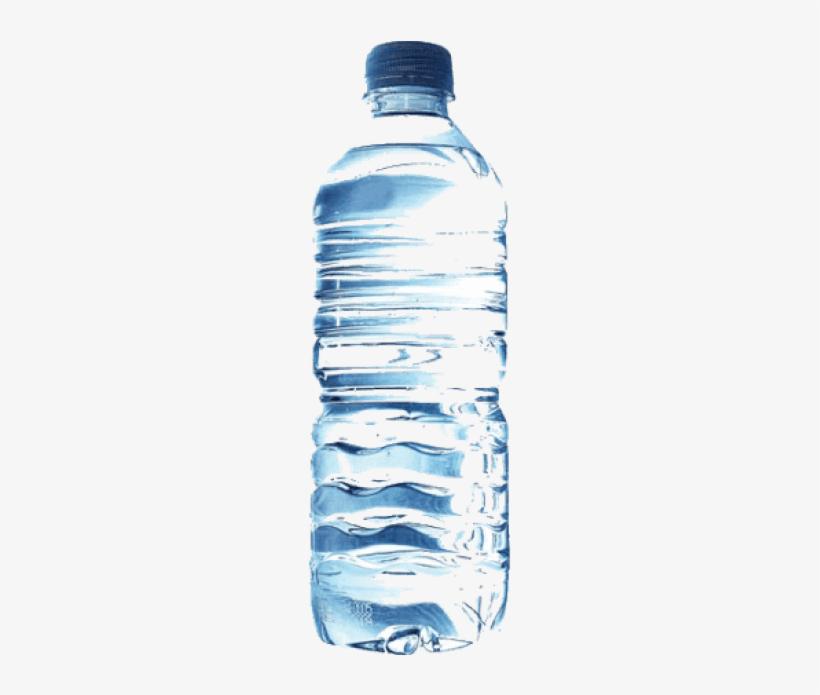

In [8]:
full_water_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Water Bottle Image Classification Dataset/data/Full/img_f_00006.png'
full_water_image = Image.open(full_water_image_path)
print("image dimensions:", full_water_image.size)
full_water_image

image dimensions: (240, 360)


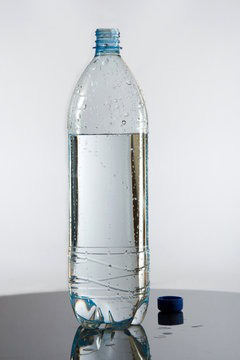

In [9]:
half_water_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Water Bottle Image Classification Dataset/data/Half/img_h_00010.jpeg'
half_water_image = Image.open(half_water_image_path)
print("image dimensions:", half_water_image.size)
half_water_image

image dimensions: (181, 279)


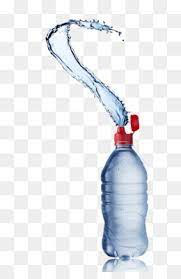

In [10]:
overflow_water_image_path = '/Users/pimawatmingkwan/Desktop/DataSci_practice/Water Bottle Image Classification Dataset/data/Overflow/img_o_00020.jpeg'
overflow_water_image = Image.open(overflow_water_image_path)
print("image dimensions:", overflow_water_image.size)
overflow_water_image

# Data processing

In [11]:
for i in range(len(x_train)):
    x_train[i] = resize(x_train[i],(100,100))

In [12]:
train_x=np.array(x_train)
train_x.shape

(486, 100, 100, 3)

In [13]:
train_datagen = ImageDataGenerator(rescale = 1/255)

In [14]:
train_set = train_datagen.flow_from_directory(train_path,  class_mode = 'sparse')

Found 486 images belonging to 3 classes.


In [15]:
train_y=train_set.classes

In [16]:
print(train_set.class_indices)

{'Full': 0, 'Half': 1, 'Overflow': 2}


In [17]:
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Model creation

In [18]:
model = Sequential()

model.add(Conv2D(10, kernel_size=3, activation='relu',input_shape=(100, 100, 3)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 10)        280       
_________________________________________________________________
flatten (Flatten)            (None, 96040)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 96041     
Total params: 96,321
Trainable params: 96,321
Non-trainable params: 0
_________________________________________________________________


In [19]:
train_x.shape

(486, 100, 100, 3)

In [20]:
history = model.fit(train_x, train_y,batch_size=32,validation_split=0.2,epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 34ms/step - loss: 2.4048 - accuracy: 0.6830 - val_loss: 13.5164 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 30ms/step - loss: 1.2892 - accuracy: 0.7655 - val_loss: 6.1199 - val_accuracy: 0.0408
Epoch 3/10
13/13 [==============================] - 0s 25ms/step - loss: 0.6349 - accuracy: 0.7861 - val_loss: 0.4370 - val_accuracy: 0.4694
Epoch 4/10
13/13 [==============================] - 0s 24ms/step - loss: 0.3689 - accuracy: 0.8454 - val_loss: 2.8869 - val_accuracy: 0.0510
Epoch 5/10
13/13 [==============================] - 0s 29ms/step - loss: 0.2877 - accuracy: 0.8608 - val_loss: 1.9925 - val_accuracy: 0.1429
Epoch 6/10
13/13 [==============================] - 0s 36ms/step - loss: 0.2218 - accuracy: 0.9098 - val_loss: 3.1824 - val_accuracy: 0.0816
Epoch 7/10
13/13 [==============================] - 0s 28ms/step - loss: 0.2270 - accuracy: 0.8969 - val_loss: 1.8205 - val_accuracy: 0.2449
Epoch 8/

In [21]:
score = model.evaluate(train_x, train_y, verbose = 3)
score

[0.6811315417289734, 0.8045267462730408]

In [22]:
predictions = model.predict_classes(train_x, verbose = 1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
16/16 [==============================] - 0s 10ms/step


In [23]:
print(predictions.tolist())
print(train_y)

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

In [24]:
confusion_matrix = confusion_matrix(train_y, predictions)
confusion_matrix

array([[305,   3,   0],
       [ 53,  86,   0],
       [ 35,   4,   0]])

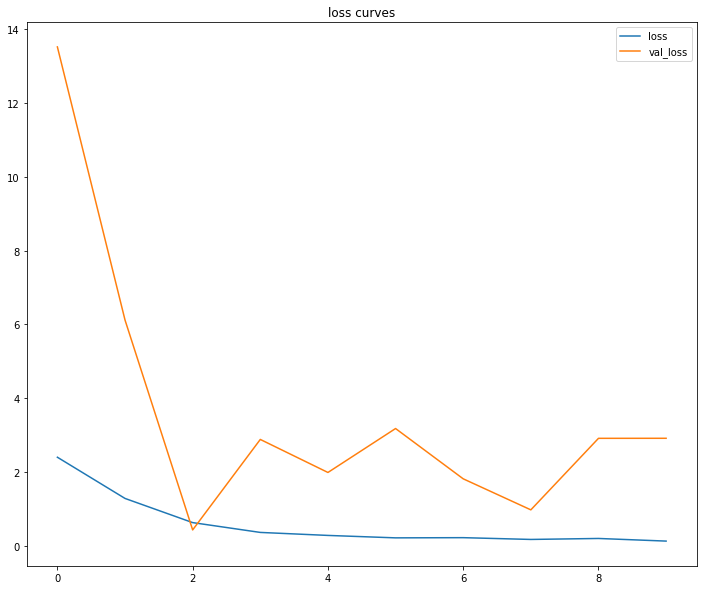

In [25]:
plt.figure(figsize=(12,10))
plt.title("loss curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

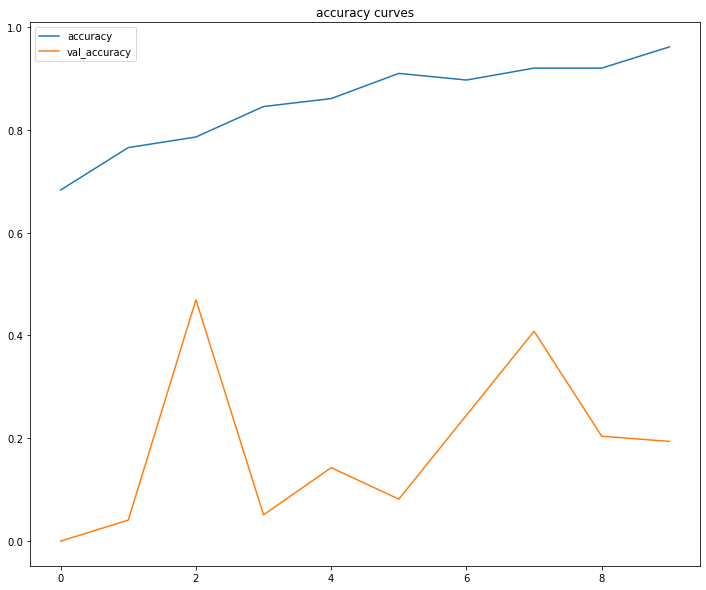

In [26]:
plt.figure(figsize=(12,10))
plt.title("accuracy curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

# Model Visualization

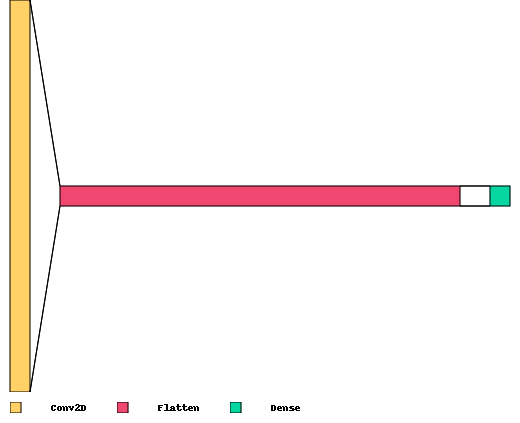

In [27]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=30)